In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
data = pd.read_csv("Heart_data.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145,233.0,1.0,2.0,150,0.0,2.3,3.0,0,6.0,0
1,67.0,1.0,4.0,160,286.0,0.0,2.0,108,1.0,NaN,2.0,3,3.0,2
2,67.0,1.0,4.0,120,229.0,0.0,2.0,129,1.0,2.6,2.0,2,7.0,1
3,37.0,1.0,3.0,130,250.0,0.0,NaN,187,0.0,3.5,3.0,0,3.0,0
4,41.0,0.0,2.0,130,204.0,0.0,2.0,172,0.0,1.4,1.0,0,3.0,0
5,56.0,1.0,2.0,120,236.0,0.0,0.0,178,0.0,0.8,1.0,0,3.0,0
6,62.0,0.0,4.0,140,268.0,0.0,2.0,160,0.0,3.6,3.0,2,3.0,3
7,57.0,0.0,4.0,120,354.0,0.0,0.0,163,1.0,0.6,1.0,0,3.0,0
8,63.0,1.0,4.0,130,NaN,0.0,2.0,147,0.0,1.4,2.0,1,7.0,2
9,53.0,NaN,4.0,140,203.0,1.0,2.0,155,1.0,3.1,3.0,0,7.0,1


In [3]:
# get the info on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   int64  
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   int64  
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   int64  
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 174.3 KB


In [4]:
# From above, we can see that there are some missing values.
# In order to get the exact count, we can do this:
data.isnull().sum()

age          79
sex          31
cp          159
trestbps      0
chol         63
fbs          79
restecg       7
thalach       0
exang        47
oldpeak      31
slope        54
ca            0
thal          7
target        0
dtype: int64

# Handling Missing Values

In [5]:
# Separate numerical and categorical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [6]:
# Impute missing values for numerical features with median
for feature in numerical_features:
    data[feature].fillna(data[feature].median(), inplace=True)

# Impute missing values for categorical features with mode
for feature in categorical_features:
    data[feature].fillna(data[feature].mode()[0], inplace=True)

In [7]:
# As we have imputed the values, to check, we will perform:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1592 non-null   float64
 1   sex       1592 non-null   float64
 2   cp        1592 non-null   float64
 3   trestbps  1592 non-null   int64  
 4   chol      1592 non-null   float64
 5   fbs       1592 non-null   float64
 6   restecg   1592 non-null   float64
 7   thalach   1592 non-null   int64  
 8   exang     1592 non-null   float64
 9   oldpeak   1592 non-null   float64
 10  slope     1592 non-null   float64
 11  ca        1592 non-null   int64  
 12  thal      1592 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 174.3 KB


In [8]:
# Now that all the missing values are gone, to further enhance the data, we will perform the following operations:

# Convert 'sex' column to integer (0 for female, 1 for male)
data['sex'] = data['sex'].astype(int)  # Converting gender to integer for consistency and ease of interpretation

# Convert 'fbs' column to integer (0 for false, 1 for true)
data['fbs'] = data['fbs'].astype(int)  # Converting fasting blood sugar to integer for consistency and ease of interpretation

# Convert 'exang' column to integer (0 for no, 1 for yes)
data['exang'] = data['exang'].astype(int)  # Converting exercise-induced angina to integer for consistency and ease of interpretation


In [9]:
# Checking the first few rows to verify the changes
print("\nFirst few rows after conversion:")
print(data.head())


First few rows after conversion:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0    1  1.0       145  233.0    1      2.0      150      0      2.3   
1  67.0    1  4.0       160  286.0    0      2.0      108      1      0.8   
2  67.0    1  4.0       120  229.0    0      2.0      129      1      2.6   
3  37.0    1  3.0       130  250.0    0      0.0      187      0      3.5   
4  41.0    0  2.0       130  204.0    0      2.0      172      0      1.4   

   slope  ca  thal  target  
0    3.0   0   6.0       0  
1    2.0   3   3.0       2  
2    2.0   2   7.0       1  
3    3.0   0   3.0       0  
4    1.0   0   3.0       0  


In [10]:
# Upon careful observation, we found that in our target column we should only have 0 for absence and 1 for presence of heart disease, but we have 0, 1, 2, 3, and 4 to verify.
print(data['target'].unique())


[0 2 1 3 4]


In [11]:
# Let's find how many rows of data have values 2, 3, and 4
count_2 = len(data[data['target'] == 2])
count_3 = len(data[data['target'] == 3])
count_4 = len(data[data['target'] == 4])

print("Number of rows with value 2:", count_2)
print("Number of rows with value 3:", count_3)
print("Number of rows with value 4:", count_4)


Number of rows with value 2: 155
Number of rows with value 3: 35
Number of rows with value 4: 13


In [12]:
# Count the number of rows with target values 2, 3, and 4
count_dropped = len(data[(data['target'] == 2) | (data['target'] == 3) | (data['target'] == 4)])

# Calculate the percentage of data to be dropped
percentage_dropped = (count_dropped / data.shape[0]) * 100

print("Percentage of data to be dropped:", percentage_dropped)


Percentage of data to be dropped: 12.751256281407036


In [13]:
# We are dropping data where the target values are 2, 3, or 4 as these values could potentially create issues. Given that it represents only 12.75% of the dataset, dropping it is acceptable and will not significantly affect our analysis.

New_data = data[data['target'].isin([0, 1])]

# Exploratory data analysis (EDA) 

In [14]:
# Descriptive Statistics

# Summary statistics for numerical features
New_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,54.146148,0.675306,1.307415,131.099352,244.996400,0.136789,0.622750,151.078474,0.289417,0.963067,1.383009,0.647948,2.763859,0.525558
std,8.944728,0.468429,1.329052,17.324673,50.180144,0.343748,0.699074,22.544520,0.453655,1.101556,0.603925,0.971068,1.253395,0.499526
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,0.000000,155.000000,0.000000,0.600000,1.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [15]:
# Univariate analysis for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

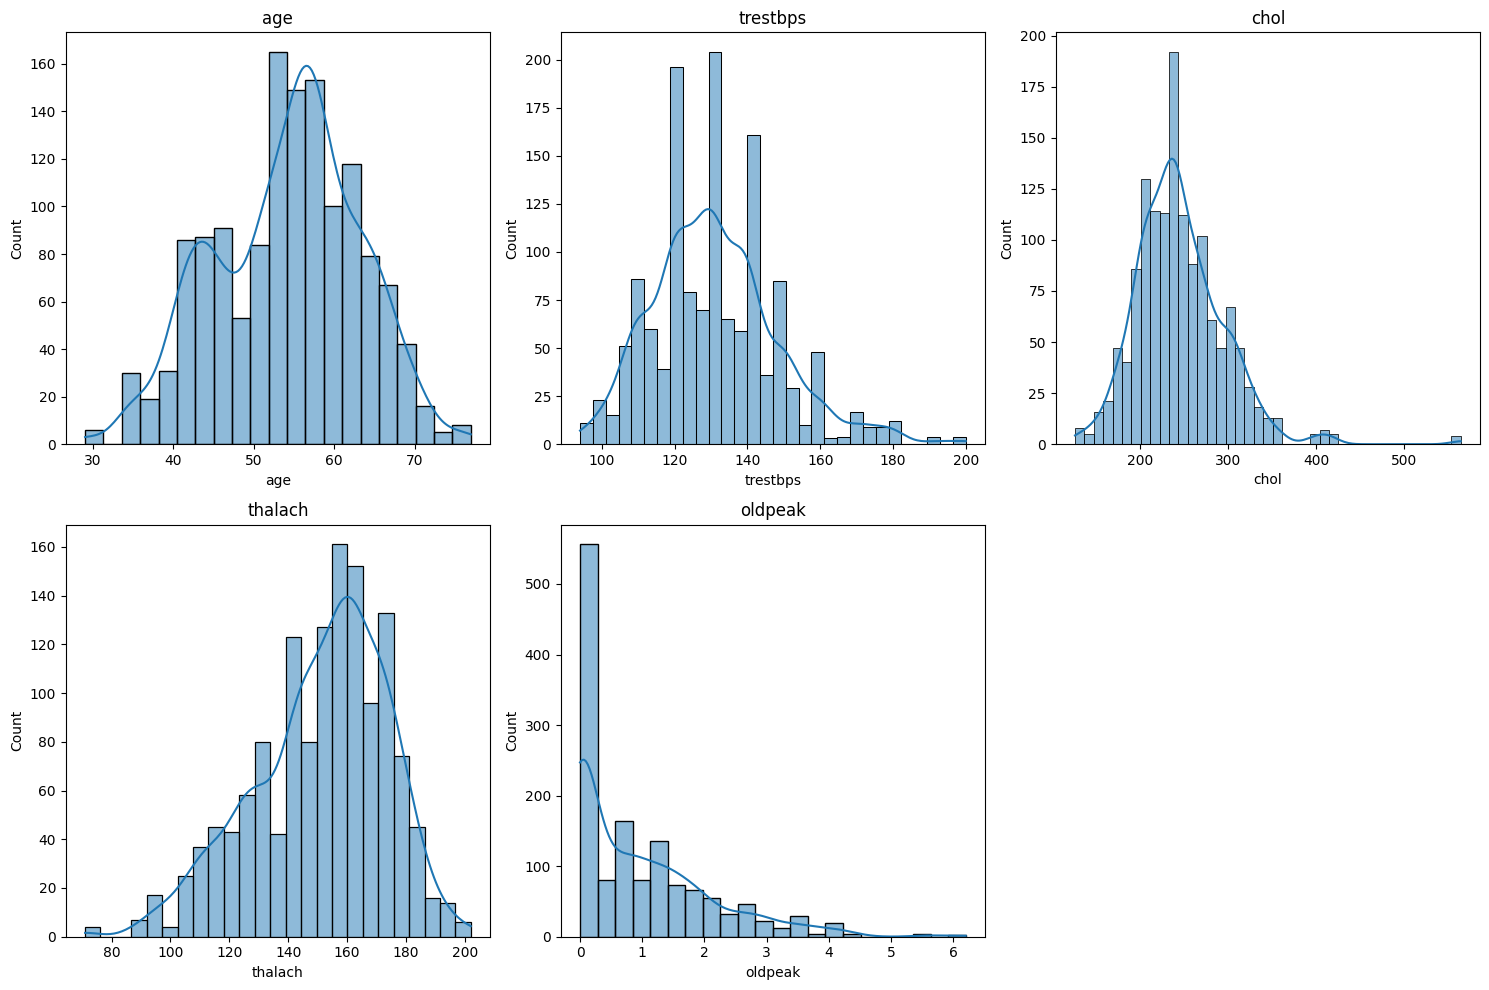

In [16]:
# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(New_data[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

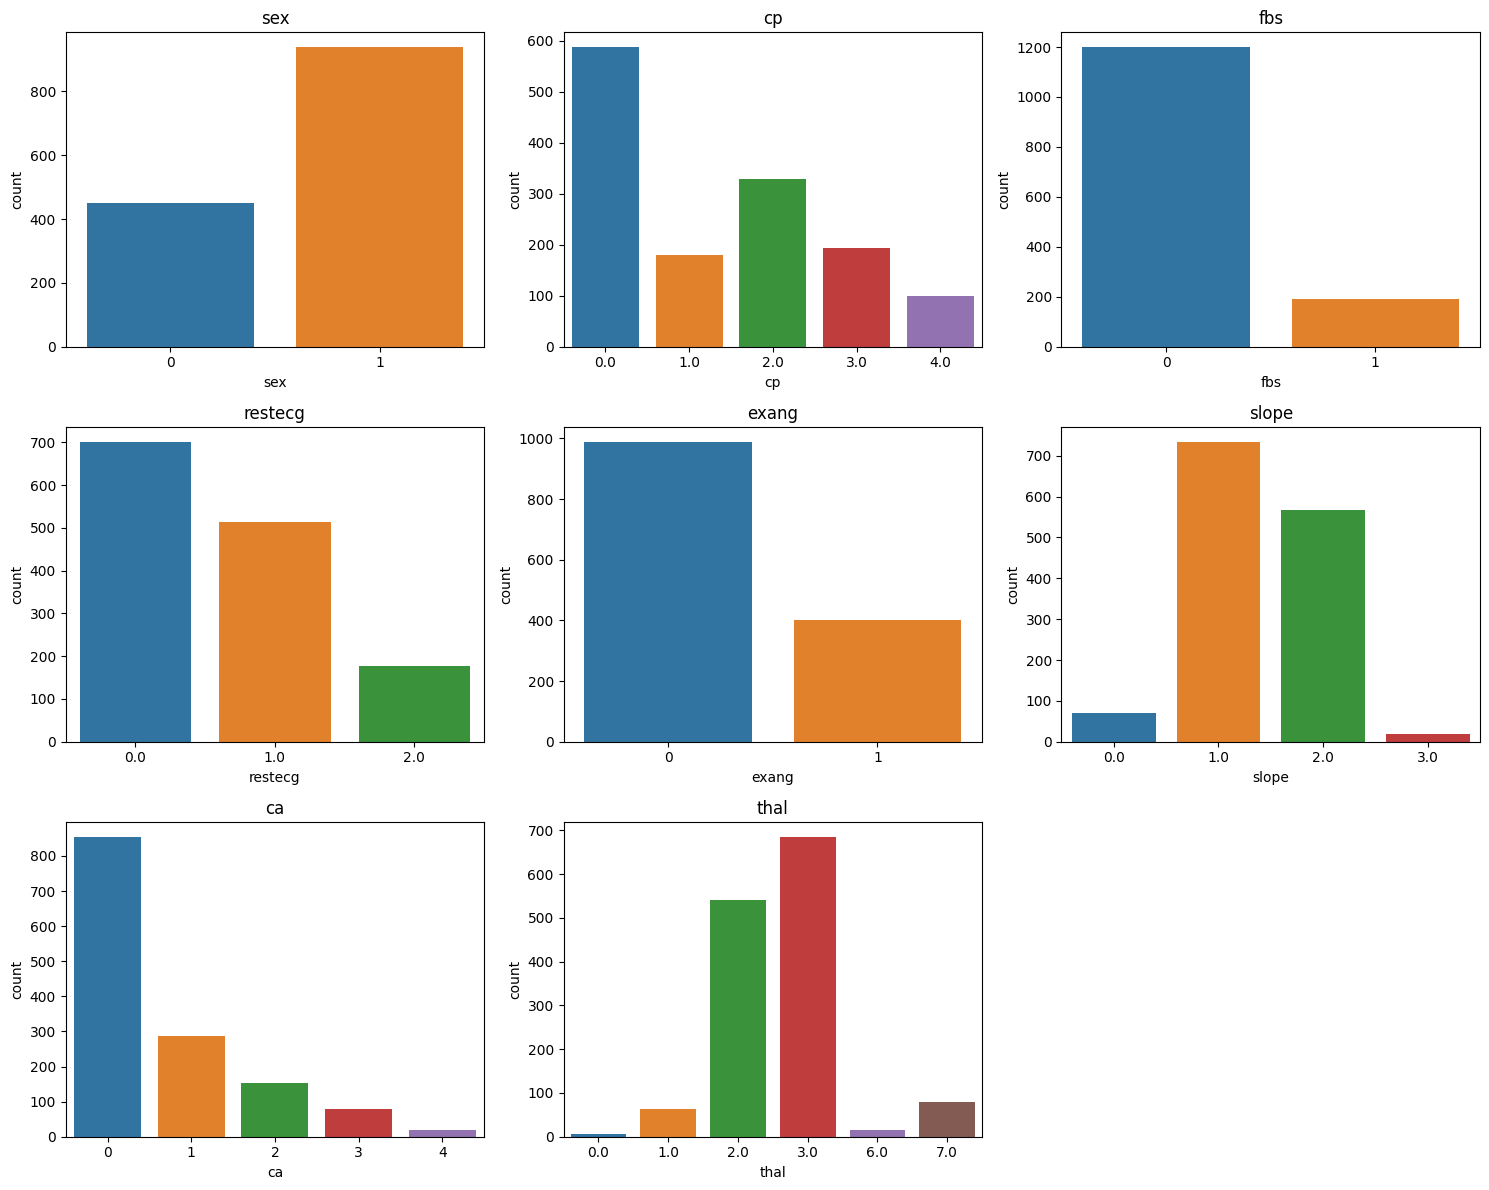

In [17]:
# Bar plots for categorical features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=New_data)
    plt.title(feature)
plt.tight_layout()
plt.show()

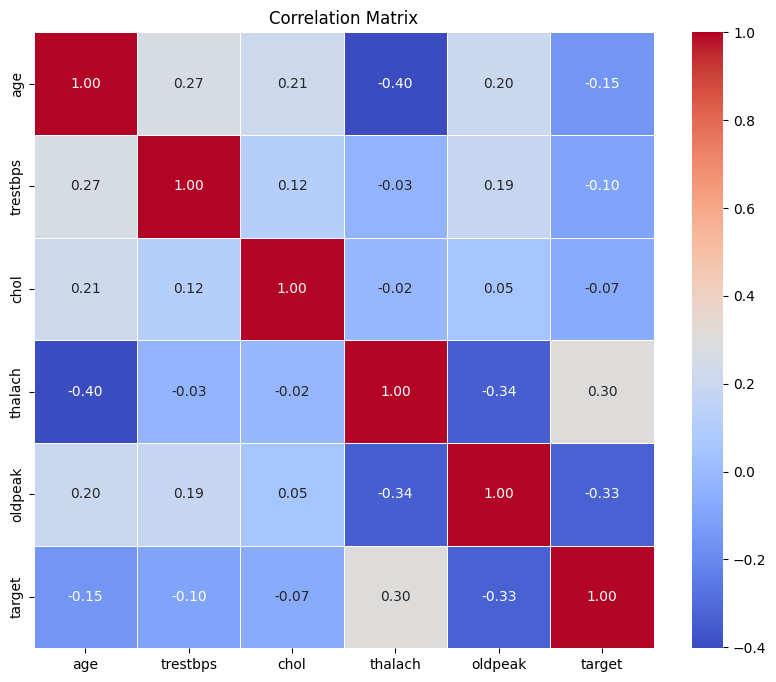

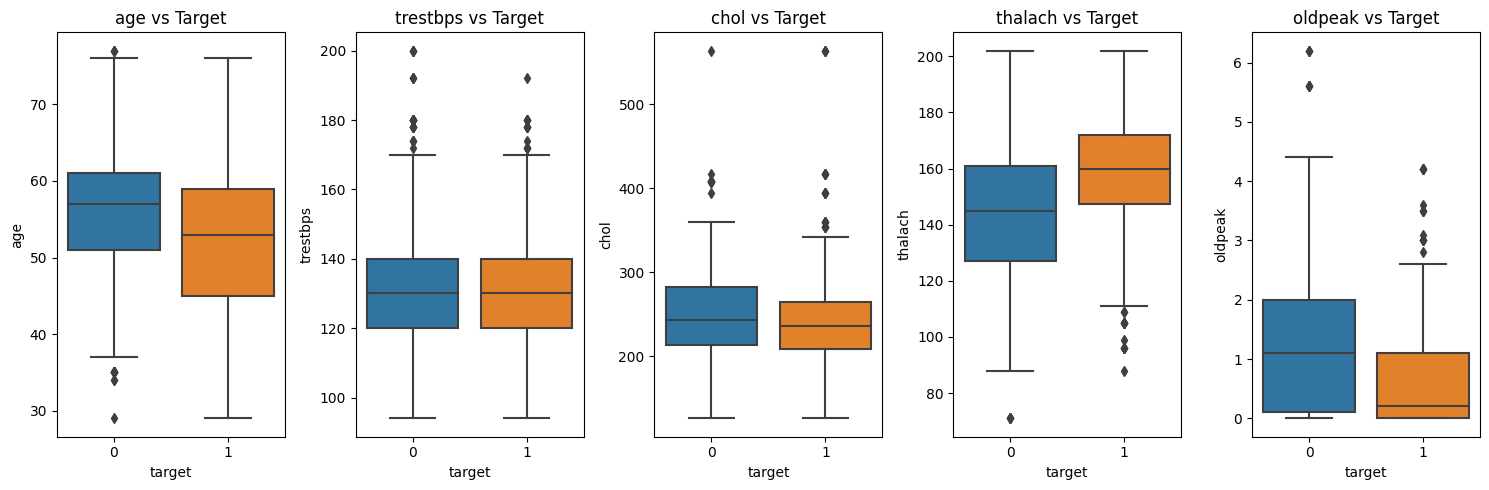

In [18]:
# Compute the correlation matrix
correlation_matrix = New_data[numerical_features + ['target']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualize relationships between numerical features and the target variable
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(x='target', y=feature, data=New_data)
    plt.title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


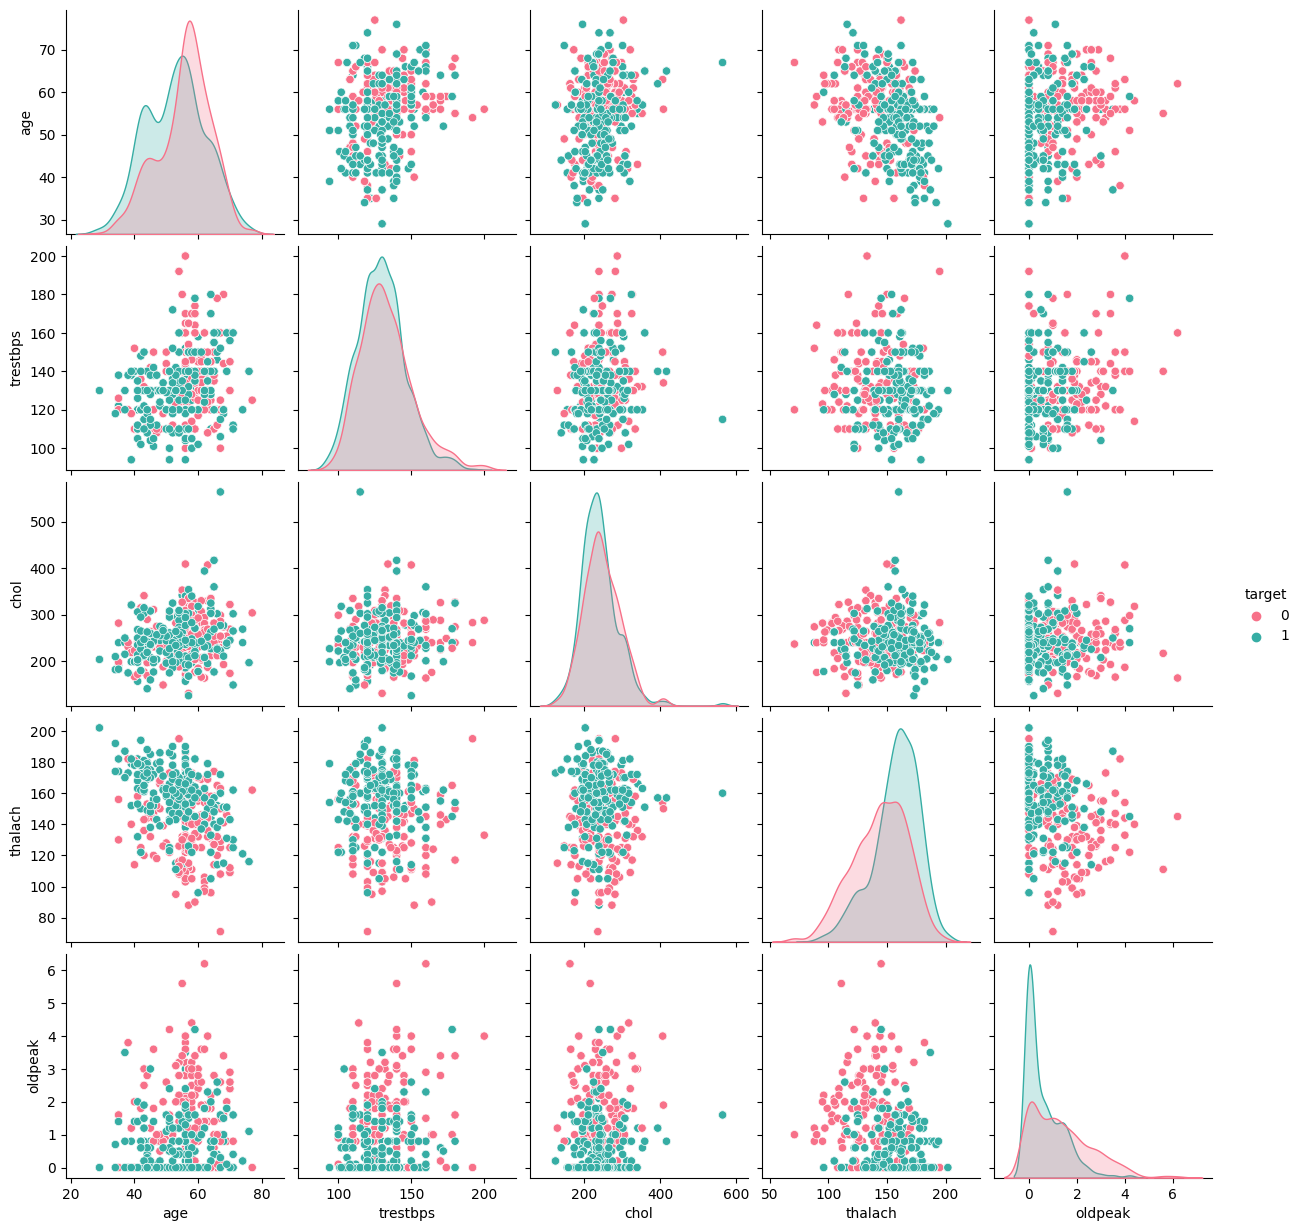

In [19]:
# Pair plots for numerical features
sns.pairplot(New_data[numerical_features + ['target']], hue='target', diag_kind='kde', palette='husl')
plt.show()


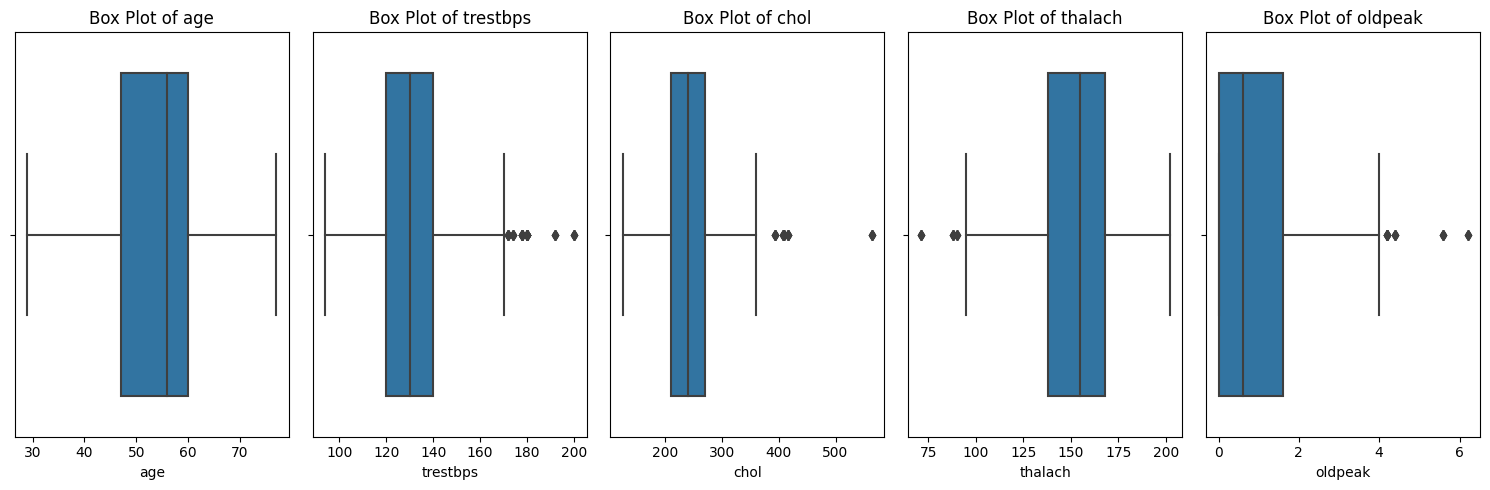

In [20]:
# Outlier Detection

# Box plots for numerical features to identify outliers
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(x=feature, data=New_data)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Feature Engineering

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define numerical and categorical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create pipeline for numerical features (scaling)
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features (one-hot encoding)
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

# Column Transformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Apply preprocessing to the entire dataset
processed_data = preprocessor.fit_transform(New_data)


In [22]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = processed_data
y = New_data['target']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 1111
Testing set size: 278


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(" Logistic Regression Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

 Logistic Regression Accuracy: 0.7697841726618705

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       128
           1       0.80      0.76      0.78       150

    accuracy                           0.77       278
   macro avg       0.77      0.77      0.77       278
weighted avg       0.77      0.77      0.77       278



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate model performance
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", accuracy_decision_tree)

# Classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))


Decision Tree Accuracy: 0.802158273381295

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       128
           1       0.82      0.81      0.81       150

    accuracy                           0.80       278
   macro avg       0.80      0.80      0.80       278
weighted avg       0.80      0.80      0.80       278



In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
random_forest_model = RandomForestClassifier()

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate model performance
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest Accuracy:", accuracy_random_forest)

# Classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_random_forest))


Random Forest Accuracy: 0.7913669064748201

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       128
           1       0.82      0.79      0.80       150

    accuracy                           0.79       278
   macro avg       0.79      0.79      0.79       278
weighted avg       0.79      0.79      0.79       278



In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluate model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Classification report
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8237410071942446

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       128
           1       0.80      0.89      0.85       150

    accuracy                           0.82       278
   macro avg       0.83      0.82      0.82       278
weighted avg       0.83      0.82      0.82       278



In [27]:
# From above we can see SVM has highest accuracy amoung all we will test this with new data

# Example input data in a dictionary
new_data = {
    'age': 55,
    'sex': 1,  # Male
    'cp': 2,  # Atypical angina
    'trestbps': 130,
    'chol': 240,
    'fbs': 0,  # False
    'restecg': 1,  # Having ST-T wave abnormality
    'thalach': 150,
    'exang': 0,  # No exercise induced angina
    'oldpeak': 2.5,
    'slope': 2,  # Flat
    'ca': 1,
    'thal': 3  # Normal
}

# Convert input data to a DataFrame

new_data_df = pd.DataFrame([new_data])

# Preprocess the input data using the preprocessor defined earlier
processed_new_data = preprocessor.transform(new_data_df)

# Make predictions
prediction = svm_model.predict(processed_new_data)

# Interpret the prediction
if prediction[0] == 0:
    print("The person is predicted to not have heart disease.")
else:
    print("The person is predicted to have heart disease.")


The person is predicted to not have heart disease.


## This result indicates the working of our Model